<a href="https://colab.research.google.com/github/yooje153/-/blob/main/2022_10_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [3]:
import matplotlib.pyplot as plt
import pandas as pd

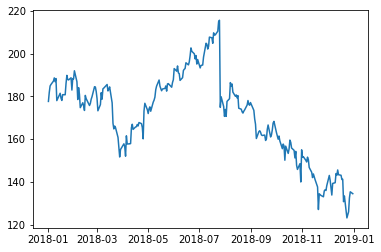

In [4]:
fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

plt.plot(fb.index, fb.open)
plt.show()

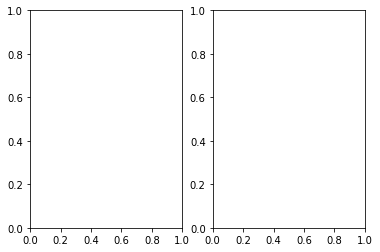

In [22]:
fig, axes = plt.subplots(1,2)

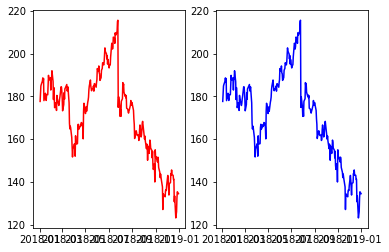

In [25]:
fig, axes = plt.subplots(1,2)
axes[0].plot(fb.index,fb.open,'-r')
axes[1].plot(fb.index,fb.open,'-b')

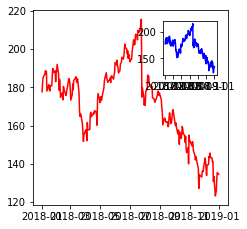

In [30]:
fig = plt.figure(figsize=(3, 3))
outside = fig.add_axes([0.1, 0.1, 0.9, 0.9])
inside = fig.add_axes([0.7, 0.7, 0.25, 0.25])
outside.plot(fb.index,fb.open,'-r')
inside.plot(fb.index,fb.open,'-b')

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [8]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()

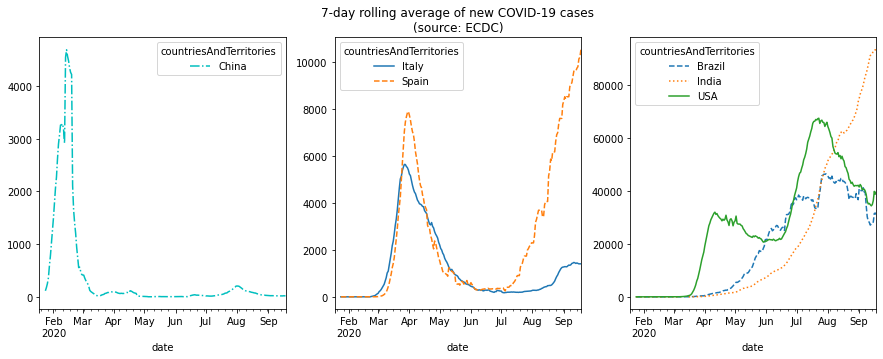

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['China']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Italy', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Brazil', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

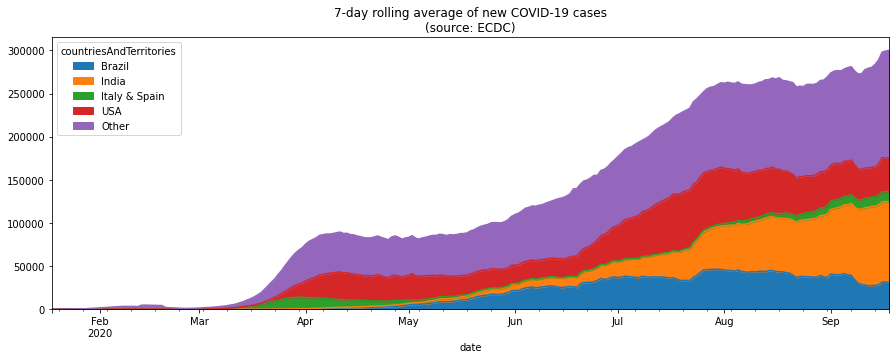

In [10]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['USA', 'Brazil', 'India', 'Italy & Spain']
]
new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

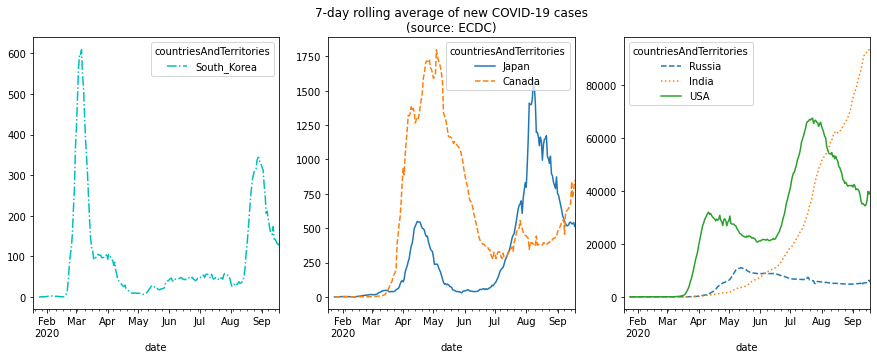

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['South_Korea']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['Japan', 'Canada']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['Russia', 'India', 'USA']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

In [15]:
new_cases_rolling_average

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,Uruguay,Uzbekistan,Venezuela,Vietnam,Western_Sahara,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,45.428571,156.857143,270.000000,18.428571,57.142857,0.0,0.0,10667.857143,154.142857,85.285714,...,0.0,5.571429,18.428571,549.285714,1035.857143,2.000000,0.0,3.714286,109.000000,78.428571
2020-09-15,45.857143,159.142857,263.285714,25.285714,60.428571,0.0,0.0,10963.571429,160.571429,82.571429,...,0.0,4.428571,17.000000,583.571429,1031.285714,2.000000,0.0,3.142857,126.285714,33.285714
2020-09-16,47.857143,159.857143,256.571429,25.285714,65.428571,0.0,0.0,11062.571429,166.571429,80.428571,...,0.0,5.857143,16.428571,602.714286,1013.142857,1.285714,0.0,3.142857,123.857143,26.857143


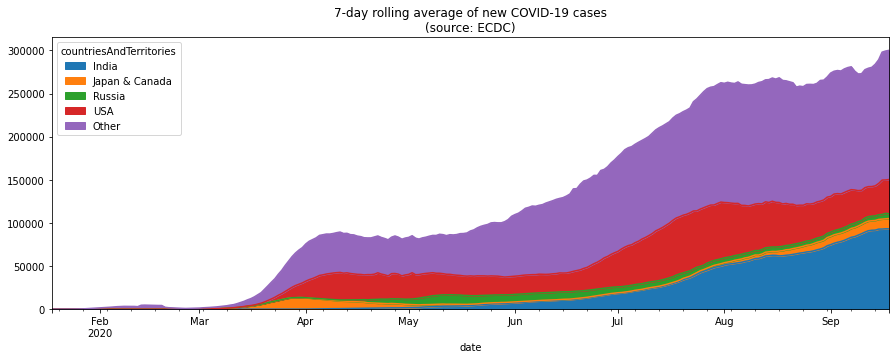

In [53]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['Japan & Canada', 'Russia','India','USA']
]
cols2 = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['Japan', 'Canada', 'Russia','India','USA']
]
new_cases_rolling_average.assign(
    **{'Japan & Canada': lambda x: x.Italy + x.Spain}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

Text(0, 0.5, 'count')

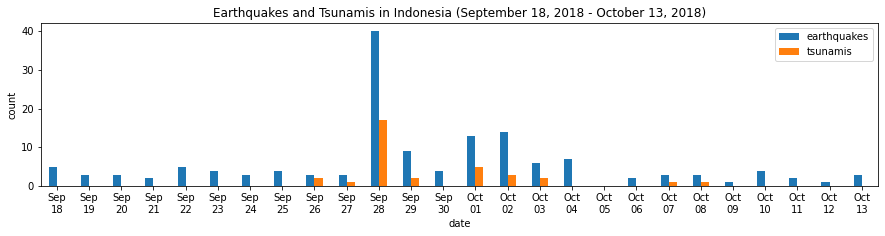

In [41]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake','tsunami'], kind='bar', figsize=(15, 3),
        rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

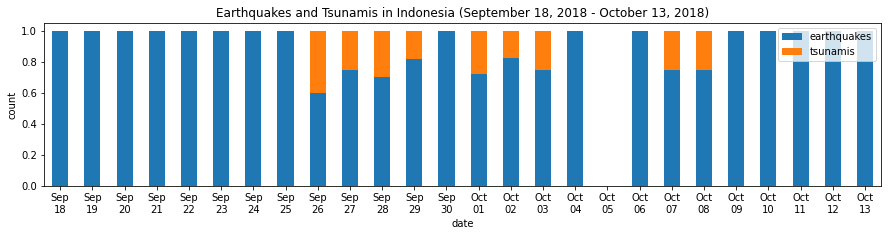

In [71]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')
indonesia_quakes[['tsunami','earthquake']].apply(lambda x: x / x.sum(), axis=1).plot(
    y=['earthquake','tsunami'], kind='bar', figsize=(15, 3),
        rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked='True')


# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'count')

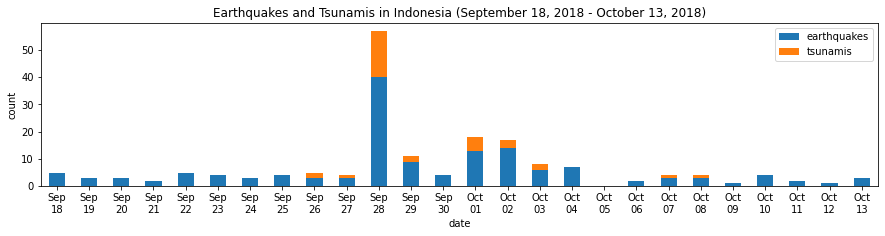

In [60]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake','tsunami'], kind='bar', figsize=(15, 3),
        rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)',
          stacked='normalize'
)


# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')